# Assignment Module 2: Product Classification

The goal of this assignment is to implement a neural network that classifies smartphone pictures of products found in grocery stores. The assignment will be divided into two parts: first, you will be asked to implement from scratch your own neural network for image classification; then, you will fine-tune a pretrained network provided by PyTorch.


## Preliminaries: the dataset

The dataset you will be using contains natural images of products taken with a smartphone camera in different grocery stores:

<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Granny-Smith.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Pink-Lady.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Lemon.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Banana.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Vine-Tomato.jpg" width="150">
</p>
<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Yellow-Onion.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Green-Bell-Pepper.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Arla-Standard-Milk.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Oatly-Natural-Oatghurt.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Alpro-Fresh-Soy-Milk.jpg" width="150">
</p>

The products belong to the following 43 classes:
```
0.  Apple
1.  Avocado
2.  Banana
3.  Kiwi
4.  Lemon
5.  Lime
6.  Mango
7.  Melon
8.  Nectarine
9.  Orange
10. Papaya
11. Passion-Fruit
12. Peach
13. Pear
14. Pineapple
15. Plum
16. Pomegranate
17. Red-Grapefruit
18. Satsumas
19. Juice
20. Milk
21. Oatghurt
22. Oat-Milk
23. Sour-Cream
24. Sour-Milk
25. Soyghurt
26. Soy-Milk
27. Yoghurt
28. Asparagus
29. Aubergine
30. Cabbage
31. Carrots
32. Cucumber
33. Garlic
34. Ginger
35. Leek
36. Mushroom
37. Onion
38. Pepper
39. Potato
40. Red-Beet
41. Tomato
42. Zucchini
```

The dataset is split into training (`train`), validation (`val`), and test (`test`) set.

The following code cells download the dataset and define a `torch.utils.data.Dataset` class to access it. This `Dataset` class will be the starting point of your assignment: use it in your own code and build everything else around it.

In [1]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset.git

Cloning into 'GroceryStoreDataset'...
fatal: unable to access 'https://github.com/marcusklasson/GroceryStoreDataset.git/': Could not resolve host: github.com


In [2]:
from pathlib import Path
from PIL import Image
from torch import Tensor
from torch.utils.data import Dataset
from typing import List, Tuple

In [3]:
class GroceryStoreDataset(Dataset):

    def __init__(self, split: str, transform=None) -> None:
        super().__init__()

        self.root = Path("/kaggle/input/dataset/GroceryStoreDataset-master/dataset")
        self.split = split
        self.paths, self.labels = self.read_file()

        self.transform = transform

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[Tensor, int]:
        img = Image.open(self.root / self.paths[idx])
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

    def read_file(self) -> Tuple[List[str], List[int]]:
        paths = []
        labels = []

        with open(self.root / f"{self.split}.txt") as f:
            for line in f:
                # path, fine-grained class, coarse-grained class
                path, _, label = line.replace("\n", "").split(", ")
                paths.append(path), labels.append(int(label))

        return paths, labels

    def get_num_classes(self) -> int:
        return max(self.labels) + 1

## Part 1: design your own network

Your goal is to implement a convolutional neural network for image classification and train it on `GroceryStoreDataset`. You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split of **around 60%**. You are free to achieve that however you want, except for a few rules you must follow:

- You **cannot** simply instantiate an off-the-self PyTorch network. Instead, you must construct your network as a composition of existing PyTorch layers. In more concrete terms, you can use e.g. `torch.nn.Linear`, but you **cannot** use e.g. `torchvision.models.alexnet`.

- Justify every *design choice* you make. Design choices include network architecture, training hyperparameters, and, possibly, dataset preprocessing steps. You can either (i) start from the simplest convolutional network you can think of and add complexity one step at a time, while showing how each step gets you closer to the target ~60%, or (ii) start from a model that is already able to achieve the desired accuracy and show how, by removing some of its components, its performance drops (i.e. an *ablation study*). You can *show* your results/improvements however you want: training plots, console-printed values or tables, or whatever else your heart desires: the clearer, the better.

Don't be too concerned with your network performance: the ~60% is just to give you an idea of when to stop. Keep in mind that a thoroughly justified model with lower accuracy will be rewarded **more** points than a poorly experimentally validated model with higher accuracy.

### STEP 1: data preprocessing and augmentation THIS PART IS BULLSHIT, GPT DID IT AND IDK WHY
In this first step we transform both the train and the validation sets, this is done because we want to do some augmentation in order to reduce the bias of the network and yada yada yada.

In [4]:
# part one, data preprocessing and augmentation
import torchvision.transforms as transforms

# Data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


### STEP 2: definition of the network
The following is a CNN which is called EnhancedCNN because its predecessor, the SimpleCNN, of course was extremely basic and didn't perform as well. 
This network uses 2d convolutions, with 64, 128, 256, 512 filters. We choose the convolutional layers because it was requested by the task assignment (aka, build a convolutional neural network). The activation function is ReLU. 

We also use batch normalization and max pooling after the convolutional layers. Batch normalization is used specifically because it speeds up convergence and improves generalization. 

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class EnhancedCNN(nn.Module):
    def __init__(self, num_classes):
        super(EnhancedCNN, self).__init__()
        # First convolutional block
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.batchnorm2 = nn.BatchNorm2d(128)

        # Second convolutional block
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(256)
        self.batchnorm4 = nn.BatchNorm2d(512)

        # Global Average Pooling layer instead of flattening
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # Output size of 1x1

        # Fully connected layers
        self.fc1 = nn.Linear(512, 1024)  # Adjust based on the output from the global avg pooling
        self.fc2 = nn.Linear(1024, num_classes)

        # Regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # First block
        x = self.pool(F.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(F.relu(self.batchnorm2(self.conv2(x))))

        # Second block
        x = self.pool(F.relu(self.batchnorm3(self.conv3(x))))
        x = self.pool(F.relu(self.batchnorm4(self.conv4(x))))

        # Global Average Pooling
        x = self.global_avg_pool(x)  # Output size becomes [batch_size, 512, 1, 1]
        x = x.view(x.size(0), -1)  # Flatten the tensor to [batch_size, 512]

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [6]:
def train_model_with_early_stopping_and_scheduler(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20, patience=5):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    epochs_no_improve = 0
    early_stop = False
    
    train_loss_arr = []
    train_acc_arr = []
    val_loss_arr = []
    val_acc_arr = []
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        
        train_loss_arr.append(epoch_loss)
        train_acc_arr.append(epoch_acc)

        print(f'Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)
        
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)
        
        val_loss_arr.append(val_loss)
        val_acc_arr.append(val_acc)

        print(f'Validation Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        # Check if early stopping condition is met
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered")
            early_stop = True
            break

        # Step the learning rate scheduler
        scheduler.step()

        print("-" * 20)

    # Restore best model weights
    print(f"Best val Acc: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model, train_loss_arr, train_acc_arr, val_loss_arr, val_acc_arr


In [7]:
# Label Smoothing Cross Entropy Loss
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing

    def forward(self, pred, target):
        # Get number of classes
        num_classes = pred.size(1)
        
        # Create smoothed labels
        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (num_classes - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), 1.0 - self.smoothing)
        
        return torch.mean(torch.sum(-true_dist * F.log_softmax(pred, dim=1), dim=1))

In [8]:
#part 3, put everything together
from torch.utils.data import DataLoader
import torch.optim as optim
import torch
from torch.optim.lr_scheduler import StepLR
import copy

# Step 1: Define the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the datasets
train_dataset = GroceryStoreDataset(split='train', transform=train_transforms)
val_dataset = GroceryStoreDataset(split='val', transform=val_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
num_classes = train_dataset.get_num_classes()
model = EnhancedCNN(num_classes).to(device)
criterion = LabelSmoothingLoss(smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  


# Train the model with early stopping
trained_model, train_loss_arr, train_acc_arr, val_loss_arr, val_acc_arr = train_model_with_early_stopping_and_scheduler(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=30, patience=5)

# Save the best model
torch.save(trained_model.state_dict(), 'best_grocery_cnn.pth')


Epoch 1/30
Training Loss: 2.8324 Acc: 0.2659
Validation Loss: 2.5706 Acc: 0.3311
--------------------
Epoch 2/30
Training Loss: 2.3168 Acc: 0.4106
Validation Loss: 2.5831 Acc: 0.3074
--------------------
Epoch 3/30
Training Loss: 2.0850 Acc: 0.4761
Validation Loss: 2.6485 Acc: 0.3446
--------------------
Epoch 4/30
Training Loss: 1.9140 Acc: 0.5432
Validation Loss: 2.4318 Acc: 0.4189
--------------------
Epoch 5/30
Training Loss: 1.7795 Acc: 0.5951
Validation Loss: 2.2266 Acc: 0.4595
--------------------
Epoch 6/30
Training Loss: 1.7003 Acc: 0.6447
Validation Loss: 2.2810 Acc: 0.4358
--------------------
Epoch 7/30
Training Loss: 1.6054 Acc: 0.6765
Validation Loss: 2.3128 Acc: 0.4257
--------------------
Epoch 8/30
Training Loss: 1.5117 Acc: 0.7295
Validation Loss: 2.2737 Acc: 0.5203
--------------------
Epoch 9/30
Training Loss: 1.4437 Acc: 0.7523
Validation Loss: 2.0681 Acc: 0.5236
--------------------
Epoch 10/30
Training Loss: 1.3454 Acc: 0.7939
Validation Loss: 2.2206 Acc: 0.4966


In [9]:
import matplotlib.pyplot as plt

def plot_accuracy(train_acc, val_acc):
    
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_loss(train_loss, val_loss):
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


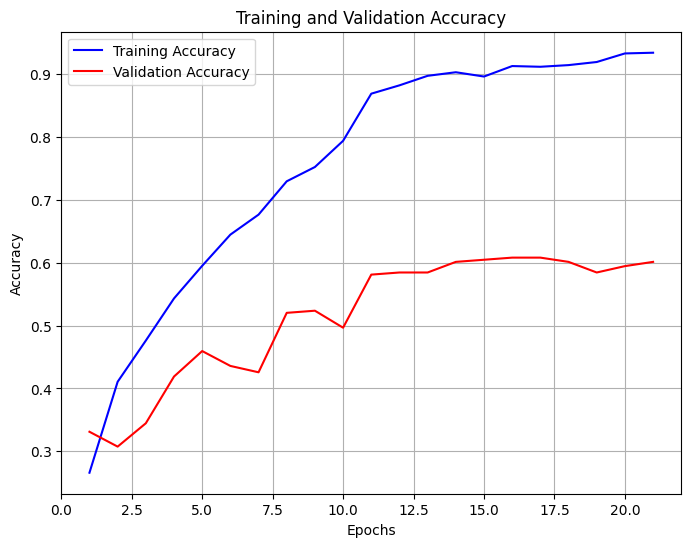

In [10]:
plot_accuracy(train_acc_arr, val_acc_arr)

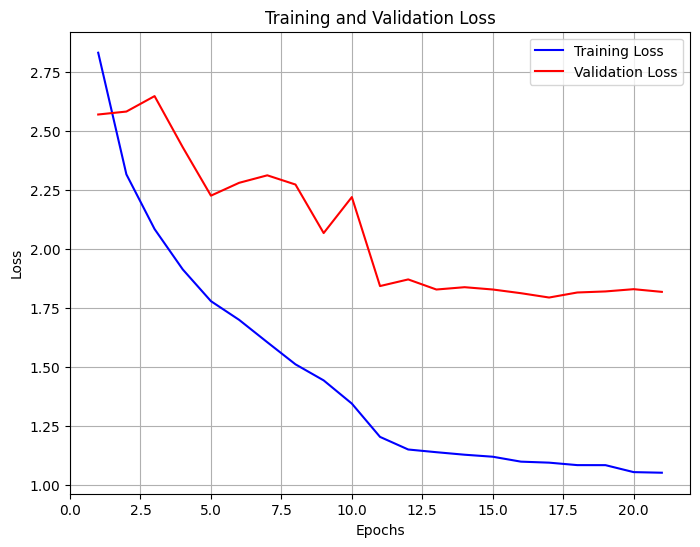

In [11]:
plot_loss(train_loss_arr, val_loss_arr)

## Part 2: fine-tune an existing network

Your goal is to fine-tune a pretrained **ResNet-18** model on `GroceryStoreDataset`. Use the implementation provided by PyTorch, do not implement it yourselves! (i.e. exactly what you **could not** do in the first part of the assignment). Specifically, you must use the PyTorch ResNet-18 model pretrained on ImageNet-1K (V1). Divide your fine-tuning into two parts:

1. First, fine-tune the Resnet-18 with the same training hyperparameters you used for your best model in the first part of the assignment.
1. Then, tweak the training hyperparameters in order to increase the accuracy on the validation split of `GroceryStoreDataset`. Justify your choices by analyzing the training plots and/or citing sources that guided you in your decisions (papers, blog posts, YouTube videos, or whatever else you find enlightening). You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split **between 80 and 90%**.

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader
from torchvision.models import resnet18, ResNet18_Weights

# Updated image transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Matching pretrained input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets with updated transformations
train_dataset = GroceryStoreDataset(split='train', transform=train_transforms)
val_dataset = GroceryStoreDataset(split='val', transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pretrained ResNet-18
weights_path = '/kaggle/input/resnet/resnet18-f37072fd.pth'
resnet18 = models.resnet18()
resnet18.load_state_dict(torch.load(weights_path, map_location=device))
#resnet18 = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
#resnet18 = models.resnet18(pretrained=True)

# Modify final layer for new number of classes
num_classes = train_dataset.get_num_classes()
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)

# Freeze all layers except the final one
for param in resnet18.parameters():
    param.requires_grad = False
for param in resnet18.fc.parameters():
    param.requires_grad = True

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

# Criterion, Optimizer, and Scheduler
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss instead of Label Smoothing
"""
optimizer = optim.SGD([
    {'params': resnet18.fc.parameters(), 'lr': 1e-3},  # Higher LR for final layer
    {'params': resnet18.layer4.parameters(), 'lr': 1e-4}  # Lower LR for pretrained layers
], momentum=0.9)
"""
optimizer = optim.Adam([
    {'params': resnet18.fc.parameters(), 'lr': 1e-3},  # Higher LR for final layer
    {'params': resnet18.layer4.parameters(), 'lr': 1e-4}])  # Lower LR for pretrained layers

scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

# Train model with existing function
trained_resnet, train_loss_arr, train_acc_arr, val_loss_arr, val_acc_arr = train_model_with_early_stopping_and_scheduler(
    model=resnet18, 
    train_loader=train_loader, 
    val_loader=val_loader, 
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler, 
    num_epochs=30, 
    patience=10
)


/tmp/ipykernel_30/2950278202.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18.load_state_dict(torch.load(weights_path, map_location=device))


Epoch 1/30
Training Loss: 2.5531 Acc: 0.3519
Validation Loss: 2.0557 Acc: 0.4122
--------------------
Epoch 2/30
Training Loss: 1.3985 Acc: 0.6568
Validation Loss: 1.5633 Acc: 0.5811
--------------------
Epoch 3/30
Training Loss: 0.9441 Acc: 0.8038
Validation Loss: 1.3429 Acc: 0.6351
--------------------
Epoch 4/30
Training Loss: 0.7418 Acc: 0.8473
Validation Loss: 1.2125 Acc: 0.6520
--------------------
Epoch 5/30
Training Loss: 0.5907 Acc: 0.8845
Validation Loss: 1.0665 Acc: 0.7128
--------------------
Epoch 6/30
Training Loss: 0.4998 Acc: 0.9027
Validation Loss: 1.0636 Acc: 0.6993
--------------------
Epoch 7/30
Training Loss: 0.4404 Acc: 0.9102
Validation Loss: 1.0079 Acc: 0.7061
--------------------
Epoch 8/30
Training Loss: 0.4209 Acc: 0.9087
Validation Loss: 0.9719 Acc: 0.6959
--------------------
Epoch 9/30
Training Loss: 0.3576 Acc: 0.9265
Validation Loss: 0.9731 Acc: 0.7230
--------------------
Epoch 10/30
Training Loss: 0.3166 Acc: 0.9428
Validation Loss: 0.9575 Acc: 0.7061


Epoch 1/20
Training Loss: 0.2172 Acc: 0.9417
Validation Loss: 0.7144 Acc: 0.7635
--------------------
Epoch 2/20
Training Loss: 0.0845 Acc: 0.9814
Validation Loss: 0.6070 Acc: 0.8041
--------------------
Epoch 3/20
Training Loss: 0.0432 Acc: 0.9902
Validation Loss: 0.6422 Acc: 0.7872
--------------------
Epoch 4/20
Training Loss: 0.0266 Acc: 0.9936
Validation Loss: 0.5838 Acc: 0.8277
--------------------
Epoch 5/20
Training Loss: 0.0381 Acc: 0.9909
Validation Loss: 0.6395 Acc: 0.8176
--------------------
Epoch 6/20
Training Loss: 0.0227 Acc: 0.9939
Validation Loss: 0.5062 Acc: 0.8480
--------------------
Epoch 7/20
Training Loss: 0.0117 Acc: 0.9981
Validation Loss: 0.5063 Acc: 0.8412
--------------------
Epoch 8/20
Training Loss: 0.0076 Acc: 0.9992
Validation Loss: 0.5573 Acc: 0.8345
--------------------
Epoch 9/20
Training Loss: 0.0073 Acc: 0.9985
Validation Loss: 0.5236 Acc: 0.8378
--------------------
Epoch 10/20
Training Loss: 0.0068 Acc: 0.9989
Validation Loss: 0.4881 Acc: 0.8514


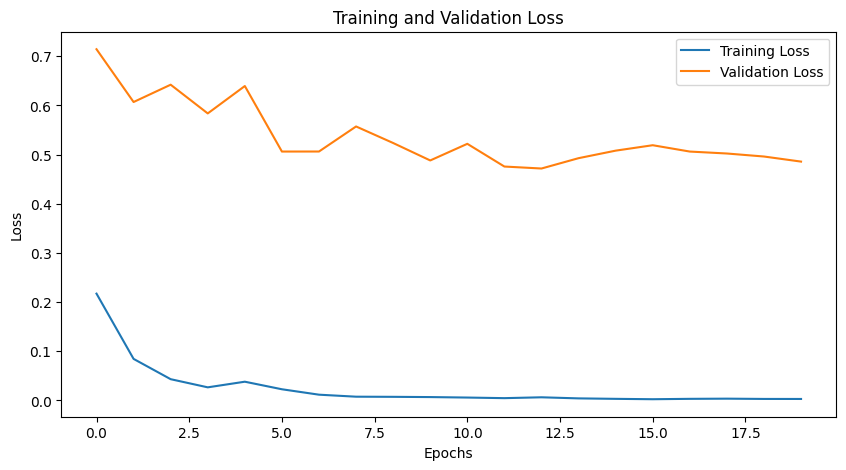

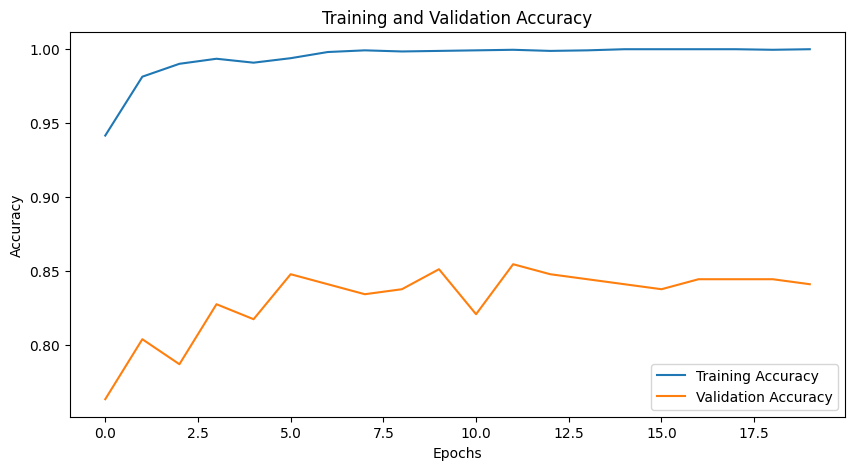

In [13]:
"""
# Unfreeze more layers in ResNet-18 for fine-tuning
for name, param in resnet18.named_parameters():
    # Unfreeze only layer4 and fc layers initially
    if 'layer4' in name or 'fc' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Optimizer with different learning rates for different layers

optimizer = optim.SGD([
    {'params': resnet18.layer4.parameters(), 'lr': 1e-4},  # Lower LR for pre-trained layer
    {'params': resnet18.fc.parameters(), 'lr': 1e-3}  # Higher LR for final layer
], momentum=0.9, weight_decay=1e-4)  # Added weight decay for regularization
"""
# Unfreeze the final few layers
for param in resnet18.parameters():
    param.requires_grad = True  # Unfreeze all layers

optimizer = optim.Adam([
    {'params': resnet18.fc.parameters(), 'lr': 1e-3},       # Higher learning rate for final layer
    {'params': resnet18.layer4.parameters(), 'lr': 1e-4},   # Intermediate for higher layers
    {'params': resnet18.layer3.parameters(), 'lr': 1e-5}    # Lower for earlier layers
])
# Learning rate scheduler to decay LR over time
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)  # Decay LR more frequently for fine-tuning

# Redefine train_model function for better monitoring (keep track of the train/val loss and accuracy per epoch)

trained_resnet, train_loss_arr, train_acc_arr, val_loss_arr, val_acc_arr = train_model_with_early_stopping_and_scheduler(
    model=resnet18,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=20,  # Adjusted epochs for fine-tuning
    patience=10  # Patience for early stopping
)

# Plotting the loss and accuracy trends for training and validation
import matplotlib.pyplot as plt

# Loss trends
plt.figure(figsize=(10, 5))
plt.plot(train_loss_arr, label='Training Loss')
plt.plot(val_loss_arr, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy trends
plt.figure(figsize=(10, 5))
plt.plot(train_acc_arr, label='Training Accuracy')
plt.plot(val_acc_arr, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
